In [1]:
%matplotlib inline
%precision 8
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

name: Vincent Zhao

# HW 3: BVP Problems II

## Question 1 - 9 Point Laplacian

Consider the two-dimensional Poisson problem defined as
$$
    \nabla^2 u = f(x,y) ~~~~ \Omega = [0, 1] \times [0, 1]
$$
with Dirichlet boundary conditions $u(x,y)|_{\partial \Omega} = 0$.

Note that the notation $\partial \Omega$ often refers to the boundary of $\Omega$ and $u(x,y)|_{\partial \Omega}$ the solution evaluted at the boundary.

**(a)** [5] If we wanted to consider solutions of the form
$$
    u(x,y) = (y^3 - y) (\cos(2 \pi x) - 1)
$$
what should we require $f(x,y)$ to be?  Is this consistent with the boundary conditions?  This technique of assuming a solution and finding what forcing function would give you that solution is called the **Method of Manufactured Solutions** and is a good way to test numerical methods.

**Answer to Question 1 (a)**

Since we have the prescribed function $u_{xx}+u_{yy}=f(x,y)$, we can find $u_{xx}$ and $u_{yy}$ by taking the double derivative

We first calculate $u_{xx}$: 

$$
\begin{aligned}
u(x)&=(y^3-y)*cos(2\pi x)-(y^3-y)\\
u_x&=-2\pi (y^3-y)*sin(2\pi x)\\
u_{xx}&=-4\pi^2 (y^3-y)*cos(2\pi x)\\
u_{xx}&=-4\pi^2(y^3-y)cos(2\pi x)\\
\end{aligned}
$$

To find $u_{yy}$ we now instead assume that $(cos(2\pi x)-1)=c$, a constant:

$$
\begin{aligned}
u(y)&=(cos(2\pi x)-1)y^3-(cos(2\pi x)-1)y\\
u_y&=3(cos(2\pi x)-1)y^2-(cos(2\pi x)-1)\\
u_{yy}&=6(cos(2\pi x)-1)y\\
u_{yy}&=6ycos(2\pi x)-6y\\
\end{aligned}
$$

We then simply substitute those equations into our initial function

$$
\begin{aligned}
f(x,y)&=u_{yy}+u_{xx}\\
f(x,y)&=6ycos(2\pi x)-6y-4\pi^2(y^3-y)cos(2\pi x)\\
\end{aligned}
$$

The boundary conditions are either $0$ or $1$ for $x$ or $y$ gives us $u(x,y)=0$.

**(b)** [10] Implement a finite difference method for the problem above with grid spacing $\Delta x = \Delta y$ using a 9-point Laplacian.

In [2]:
# Suggested modules to use to construct matrix A
# You do not have to use these, they just may be helpful
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

def solve_9point(m, f):

    x = numpy.linspace(0, 1, m + 2)
    y = numpy.linspace(0, 1, m + 2)
    delta_x = x[1]-x[0]

    #Construct A
    e = numpy.ones(m)
    S = sparse.spdiags([-1*e, -10*e, -1*e], [-1, 0, 1], m, m)
    I = sparse.spdiags([-1/2*e, e, -1/2*e], [-1, 0, 1], m, m)
    A = sparse.kron(I,S)+sparse.kron(S,I)
    A /= 6*(delta_x**2)
    
    #RHS
    X, Y = numpy.meshgrid(x[1:-1], y[1:-1])
    f = f(X,Y)
    
    #Solve
    U = numpy.zeros((m+2, m+2))
    U[1:-1, 1:-1] = linalg.spsolve(A, f.reshape(m**2, order='F')).reshape((m, m), order='F')
    
    return x, y, U

In [3]:
f = lambda x, y: -(20.0 * y**3 + 9.0 * numpy.pi**2 * (y - y**5)) * numpy.sin(3.0 * numpy.pi * x)
u_true = lambda x, y: (y - y**5) * numpy.sin(3.0 * numpy.pi * x)

x, y, U = solve_9point(100, f)
X, Y = numpy.meshgrid(x, y)
error = numpy.linalg.norm((x[1] - x[0]) * (u_true(X, Y) - U), ord=1)
print(error)
assert error < 1e-3
print("Success!")

0.00026543132573200344
Success!


**(c)** [5] Show that the method is second-order accurate by preforming a convergence study (i.e. plot the error vs. $\Delta x$ and compare this to the slopes for first and second order accurate methods).

In [1]:
f = lambda x, y: -(20.0 * y**3 + 9.0 * numpy.pi**2 * (y - y**5)) * numpy.sin(3.0 * numpy.pi * x)
u_true = lambda x, y: (y - y**5) * numpy.sin(3.0 * numpy.pi * x)

mrange = numpy.arange(10, 100, 10)

delta_x = numpy.empty(mrange.shape)
error = numpy.empty((mrange.shape[0], numpy.size(mrange)))


for (i, m) in enumerate(mrange):
    
    x = numpy.linspace(0, 1, m + 2)
    delta_x[i] = (1 - 0) / (m + 1)
    
    #Solve matrix
    x, y, U = solve_9point(m, f)
    X, Y = numpy.meshgrid(x, y)
    error[i] = numpy.linalg.norm((x[1] - x[0]) * (u_true(X, Y) - U), ord=1)
       
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))

axes.loglog(delta_x, error, 'o')
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, '--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, '--', label="2nd Order")
axes.legend(loc='best')
axes.set_title("Convergence")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")
plt.show()

NameError: name 'numpy' is not defined

**(d)** [15] Show that the 9-point Laplacian can be written as a 5-point Laplacian **plus** a finite difference approximation of $\frac{1}{6}\Delta x^2 u_{xxyy} + \mathcal O(\Delta x^4)$.  Be explicit about the derivation of the truncation error derivation.

**Answer to Question 1 (d)**

We can know that 9-point stencil and 5-point local truncation error can be written as below:
$$
\begin{aligned}
\nabla^2 u_{ij} &= \frac{1}{6 \Delta x^2} \left(4 u_{i-1,j} + 4 u_{i+1,j} + 4 u_{i,j-1} + 4 u_{i,j+1} + u_{i-1,j-1} + u_{i+1,j-1} + u_{i+1,j+1} + u_{i-1,j+1} -20 u_{i,j}  \right)\\
\tau_{ij} &=  \frac{1}{12} \Delta x^2 (u_{xxxx} + u_{yyyy}) + \mathcal{O}(\Delta x^4)\\
\end{aligned}
$$

After applying Talyors series on $\nabla^2 u(x_i,y_j)$ we then can get something below:

$$
\nabla^2 u(x_i,y_j) = \nabla^2 u + \frac{1}{12}\Delta x^2 (u_{xxxx} + 2u_{xxyy} + u_{yyyy}) + \mathcal{O}(\Delta x^4)
$$

We then can simply do the subtraction by taking 5 point lte away from 9 point stencil by the calculation below:

$$
\left(\frac{1}{12}\Delta x^2 (u_{xxxx} + 2u_{xxyy} + u_{yyyy}) + \mathcal{O}(\Delta x^4)\right) - \left(\frac{1}{12} \Delta x^2 (u_{xxxx} + u_{yyyy}) + \mathcal{O}(\Delta x^4)\right)
$$

We then can know:

$$
\frac{1}{6}\Delta ^2 u_{xxyy} + \mathcal{O}(\Delta x^4)
$$

**(e)** [10] Modify your function to use the trick introduced in class that will cause the 9-point Laplacian stencil to become 4th order accurate.  Show that this is true via a convergence study.

In [5]:
def solve_9point_modified(m, f):
    
    #modified laplacian
    mod_l = lambda x, y: (180*(numpy.pi**2)*(y**3)*numpy.sin(3.0 * numpy.pi * x))-(120*y*numpy.sin(3.0 * numpy.pi * x))+(-9*(numpy.pi**2)*-(20.0 * y**3 + 9.0 * numpy.pi**2 * (y - y**5))*numpy.sin(3*numpy.pi*x))

    x = numpy.linspace(0, 1, m + 2)
    y = numpy.linspace(0, 1, m + 2)
    delta_x = x[1]-x[0]

    #Construct A
    e = numpy.ones(m)
    S = sparse.spdiags([-1*e, -10*e, -1*e], [-1, 0, 1], m, m)
    I = sparse.spdiags([-1/2*e, e, -1/2*e], [-1, 0, 1], m, m)
    A = sparse.kron(I,S)+sparse.kron(S,I)
    A /= 6*(delta_x**2)
    
    #RHS
    X, Y = numpy.meshgrid(x[1:-1], y[1:-1])
    f = f(X,Y)+((delta_x**2)/12)*mod_l(X,Y)

    #Solve
    U = numpy.zeros((m+2, m+2))
    U[1:-1, 1:-1] = linalg.spsolve(A, f.reshape(m**2, order='F')).reshape((m, m), order='F')

    return x, y, U

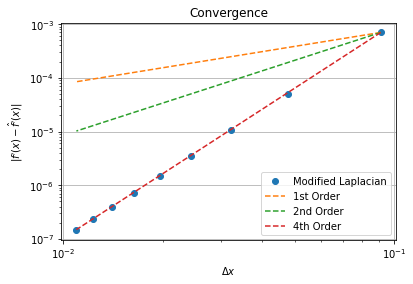

In [6]:
f = lambda x, y: -(20.0 * y**3 + 9.0 * numpy.pi**2 * (y - y**5)) * numpy.sin(3.0 * numpy.pi * x)
u_true = lambda x, y: (y - y**5) * numpy.sin(3.0 * numpy.pi * x)

mrange = numpy.arange(10, 100, 10)

delta_x = numpy.empty(mrange.shape)
error = numpy.empty((mrange.shape[0], numpy.size(mrange)))


for (i, m) in enumerate(mrange):
    
    x = numpy.linspace(0, 1, m + 2)
    delta_x[i] = (1 - 0) / (m + 1)
    
    #Solve matrix
    x, y, U = solve_9point_modified(m, f)
    X, Y = numpy.meshgrid(x, y)
    error[i] = numpy.linalg.norm((x[1] - x[0]) * (u_true(X, Y) - U), ord=1)
       
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))



axes.loglog(delta_x, error[:,0], 'o', label = "Modified Laplacian")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, '--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, '--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 4.0) * delta_x**4.0, '--', label="4th Order")
axes.legend(loc='best')
axes.set_title("Convergence")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")
axes.grid()
plt.show()

## Question 2 - Directional Sweeps

Let us consider some modifications to the Gauss-Seidel method we discussed and when one version might be better than the other.

**(a)** [5] The Gauss-Seidel method for the discretization of $u''(x) = f(x)$
takes the form 
$$
    U_i^{(k+1)} = \frac{1}{2} (U_{i+1}^{(k)} + U_{i-1}^{(k+1)}) - f(x_i) \frac{\Delta x^2}{2}
$$
if we assume we are marching forwards across the grid,
for $i=1,~2,~\ldots,~m$.  We can also define a *backwards Gauss-Seidel
method* by setting
$$
    U_i^{(k+1)} = \frac{1}{2} (U_{i+1}^{(k+1)} + U_{i-1}^{(k)}) - f(x_i) \frac{\Delta x^2}{2}
$$
Show that this is a matrix splitting method of the type described in the lecture notes and what the splitting is.

**Answer to Question 2 (a)**

The definition of a matrix splitting method is rewriting $A$ as $M - N$, and we use $M$ as the factor matrix of $U^{k+1}$ and $N$ as the factor matrix of $U^{k}$. Also, the Gauss-Seidel method means we rewrite the square system of $n$ linear equations with unknown $\textbf{x}$ by taking $x^{k+1}$ and $x^{k}$ into consideration at the same time, for example, $A \mathbf{x}=\mathbf{b}$ can be rewrtitten as: $L_{*} \mathbf{x}^{(k+1)}=\mathbf{b}-U \mathbf{x}^{(k)}$:
Since we rewrite the Gauss-Seidel method for the discretization of $u''(x) = f(x)$ as:
 - Forward:
 $U_i^{(k+1)} = \frac{1}{2} (U_{i+1}^{(k)} + U_{i-1}^{(k+1)}) - f(x_i) \frac{\Delta x^2}{2}
 $
 - Backward:
 $U_i^{(k+1)} = \frac{1}{2} (U_{i+1}^{(k+1)} + U_{i-1}^{(k)}) - f(x_i) \frac{\Delta x^2}{2}
 $
We then know the the aim of matrix splitting methods is dividing A into 2 parts for $U^{k+1}$ and $U^{k}$ respectively and we also know Gauss-Seidel actually has already created a square system of $U^{k+1}$ and $U^{k}$.

We then can say Gauss-Seidel actually is a matrix splitting method

Since $L_{*} \mathbf{x}^{(k+1)}=\mathbf{b}-U \mathbf{x}^{(k)}$ from Gauss-Seidel Method and $M U^{(k+1)} = N U^{(k)} + b$, we can say $L_{*} = M$, $N = -U$

**(b)** [5] Implement the backwards Gauss-Seidel method and show that the convergence is at the same rate as the forward version (do this computationally, you do not need to do this analytically).  Use the same expected iteration count as with the forwards method.

In [7]:
def solve_BGS(a, b, alpha, beta, m, f):
    
    # Descretization
    x_bc = numpy.linspace(a, b, m + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (m + 1)

    # Expected iterations needed
    iterations_GS = int(2.0 * numpy.log(delta_x) / numpy.log(1.0 - numpy.pi**2 * delta_x**2))
    
    # Initial guess for iterations
    U = numpy.zeros(m + 2)
    U[0] = alpha
    U[-1] = beta
    
    for k in range(iterations_GS):

        for i in range(m, 0, -1):          
            U[i] = 0.5 * (U[i+1] + U[i-1]) - f(x_bc[i]) * delta_x**2 / 2.0
              
    return x_bc, U

In [8]:
# Problem setup
a = 0.0
b = 1.0
alpha = 0.0
beta = 3.0
f = lambda x: numpy.exp(x)
u_true = lambda x: (4.0 - numpy.exp(1.0)) * x - 1.0 + numpy.exp(x)

x, U = solve_BGS(a, b, alpha, beta, 150, f)
error = numpy.linalg.norm((x[1] - x[0]) * (u_true(x) - U), ord=1)
print(error)
assert(error < 1e-4)
print("Success!")

4.595681653803634e-05
Success!


**(c)** [10] Modify the code so that it solves the steady-state problem
$$
    \epsilon u''(x) - u'(x) = f(x)
$$
we had before with the same boundaries and $f(x) = -1$.  This time however use the one-sided approximation to the first derivative
$$
    \frac{U_i - U_{i-1}}{\Delta x}.
$$
Test both forward and backward Gauss-Seidel for the resulting linear system.  Use the value $\epsilon = 0.01$, $m = 100$, and a maximum number of iterations of $250$.  Plot the convergence of both approaches.

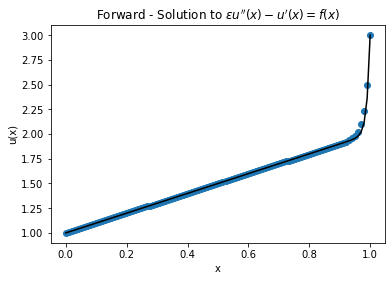

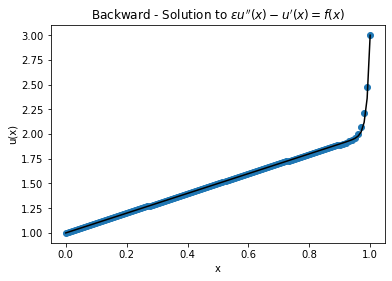

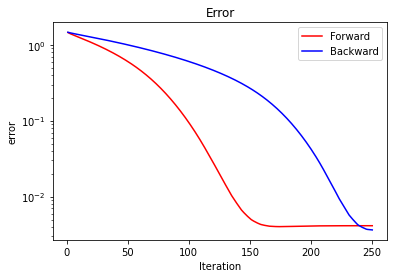

In [9]:
a = 0.0
b = 1.0
alpha = 1.0
beta = 3.0
epsilon = 0.01
u_true = lambda x: alpha + x + (beta - alpha - 1.0) * (numpy.exp(x / epsilon) - 1.0) / (numpy.exp(1.0 / epsilon) - 1.0)

def U_true(a, b, u_a, u_b, f, m):
    """Compute the solution to the given linear system"""
    x_bc = numpy.linspace(a, b, m + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (m + 1)
    
    # Construct matrix A
    A = numpy.zeros((m, m))
    diagonal = numpy.ones(m) / delta_x**2
    A += numpy.diag(diagonal * -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)

    # Construct RHS
    b = f(x)
    b[0] -= u_a / delta_x**2
    b[-1] -= u_b / delta_x**2

    # Solve system
    U = numpy.empty(m + 2)
    U[0] = u_a
    U[-1] = u_b
    U[1:-1] = numpy.linalg.solve(A, b)
    
    return U

# Descretization
m = 100
x_bc = numpy.linspace(a, b, m + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (m + 1)

# Expected iterations needed
iterations_GS = 250

# Solve system
U_system = U_true(a, b, alpha, beta, f, m)

# Initial guess for iterations
U_f = numpy.zeros(m + 2)
U_f[0] = alpha
U_f[-1] = beta

U_b = numpy.zeros(m + 2)
U_b[0] = alpha
U_b[-1] = beta

convergence_FGS = numpy.zeros((iterations_GS, 2))
step_size_FGS = numpy.zeros(iterations_GS)

convergence_BGS = numpy.zeros((iterations_GS, 2))
step_size_BGS = numpy.zeros(iterations_GS)

error = numpy.zeros((iterations_GS, 2))


#Forward
for k in range(iterations_GS):
    U_old = U_f.copy()
    for i in range(1, m + 1):
        U_f[i] = (epsilon * U_f[i+1] + (epsilon + delta_x) * U_f[i-1] - (-1) * delta_x**2 ) / (2 * epsilon + delta_x)

    convergence_FGS[k, 0] = numpy.linalg.norm(U_system - U_f, ord=2)
    convergence_FGS[k, 1] = numpy.linalg.norm(u_true(x_bc) - U_f, ord=2)
    step_size_FGS[k] = numpy.linalg.norm(U_old - U_f, ord=2)
    error[k,0] = numpy.linalg.norm((x_bc[1] - x_bc[0]) * (u_true(x_bc) - U_f), ord=1)

#Backward
for k in range(iterations_GS):
    U_old = U_b.copy()
    for i in range(m, 0, -1):
        U_b[i] = (epsilon * U_b[i+1] + (epsilon + delta_x) * U_b[i-1] - (-1) * delta_x**2 ) / (2 * epsilon + delta_x)

    convergence_BGS[k, 0] = numpy.linalg.norm(U_system - U_b, ord=2)
    convergence_BGS[k, 1] = numpy.linalg.norm(u_true(x_bc) - U_b, ord=2)
    step_size_BGS[k] = numpy.linalg.norm(U_old - U_b, ord=2)
    error[k,1] = numpy.linalg.norm((x_bc[1] - x_bc[0]) * (u_true(x_bc) - U_b), ord=1)
    
# Plot Forward result 
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U_f, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Forward - Solution to $\epsilon u^{\prime\prime}(x)- u^{\prime}(x) = f(x)$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")

# fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 3)
# axes = fig.add_subplot(1, 3, 1)
# axes.semilogy(list(range(iterations_GS)), step_size_FGS, 'o')
# axes.semilogy(list(range(iterations_GS)), numpy.ones(iterations_GS) * delta_x**2, 'r--')
# axes.set_title("Forward - Subsequent Step Size - GS")
# axes.set_xlabel("Iteration")
# axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")
# axes = fig.add_subplot(1, 3, 2)
# axes.semilogy(list(range(iterations_GS)), convergence_FGS[:, 0], 'o')
# axes.semilogy(list(range(iterations_GS)), numpy.ones(iterations_GS) * epsilon, 'r--')
# axes.set_title("Forward - Convergence to Solution of System - GS")
# axes.set_xlabel("Iteration")
# axes.set_ylabel("$||U^* - U^{(k-1)}||_2$")
# axes = fig.add_subplot(1, 3, 3)
# axes.semilogy(list(range(iterations_GS)), convergence_FGS[:, 1], 'o')
# axes.semilogy(list(range(iterations_GS)), numpy.ones(iterations_GS) * delta_x**2, 'r--')
# axes.set_title("Forward - Convergence to True Solution - GS")
# axes.set_xlabel("Iteration")
# axes.set_ylabel("$||u(x) - U^{(k-1)}||_2$")

#Plot backward result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U_b, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Backward - Solution to $\epsilon u^{\prime\prime}(x)- u^{\prime}(x) = f(x)$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")

# fig = plt.figure()
# fig.set_figwidth(fig.get_figwidth() * 3)
# axes = fig.add_subplot(1, 3, 1)
# axes.semilogy(list(range(iterations_GS)), step_size_BGS, 'o')
# axes.semilogy(list(range(iterations_GS)), numpy.ones(iterations_GS) * delta_x**2, 'r--')
# axes.set_title("Backward - Subsequent Step Size - GS")
# axes.set_xlabel("Iteration")
# axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")
# axes = fig.add_subplot(1, 3, 2)
# axes.semilogy(list(range(iterations_GS)), convergence_BGS[:, 0], 'o')
# axes.semilogy(list(range(iterations_GS)), numpy.ones(iterations_GS) * epsilon, 'r--')
# axes.set_title("Backward - Convergence to Solution of System - GS")
# axes.set_xlabel("Iteration")
# axes.set_ylabel("$||U^* - U^{(k-1)}||_2$")
# axes = fig.add_subplot(1, 3, 3)
# axes.semilogy(list(range(iterations_GS)), convergence_BGS[:, 1], 'o')
# axes.semilogy(list(range(iterations_GS)), numpy.ones(iterations_GS) * delta_x**2, 'r--')
# axes.set_title("Backward - Convergence to True Solution - GS")
# axes.set_xlabel("Iteration")
# axes.set_ylabel("$||u(x) - U^{(k-1)}||_2$")


#plot error
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
iteration_range = numpy.linspace(1, 250, 250)
axes.semilogy(iteration_range, error[:,0], 'r', label="Forward")
axes.semilogy(iteration_range, error[:,1], 'b', label="Backward")
axes.set_title("Error")
axes.set_xlabel("Iteration")
axes.set_ylabel("error")
axes.legend(loc = 'best')


plt.show()




**(d)** [5] Explain intuitively why sweeping in one direction works so much better than
in the other.

**Hint**: Note that this equation is the steady equation for an advection-diffusion PDE 
$$
    u_t(x,t) + u_x(x,t) = \epsilon u_{xx}(x,t) - f(x).
$$  
You might consider how the methods behave in the case $\epsilon = 0$.

**Answer to Question 2 (d)**

The reason why sweeping backward works so much better than forward is because the $u^{\prime}$ term. 

The first derivative only has 2 terms below and since we know $u^{\prime \prime}$ is actually a symmetric term (consists of U_{i-1}, U_{i}, U_{i+1}), which means it will perfectly fit no matter which direction u would like to consider, however, since there are only 2 terms in $u^{\prime}$, we can definitely say that one direction is better than the other because $u^{\prime}$ will automatically control ur outcome by its terms

$$
    \frac{U_i - U_{i-1}}{\Delta x}.
$$

# Question 3 - Higher Order Approximations

Let us consider a few approaches to achieving higher order convergence.  For all of these questions consider the basic ODE
$$
    u''(x) = f(x) \quad \quad x \in [0, L] \quad \quad u(0) = \alpha, \quad u(L) = \beta
$$
For all of these you can solve the resulting system using an appropriate `numpy` or `scipy` command.

**(a) 4th order finite difference:** [15] Using the following fourth order accurate finite difference approximations to write a function that solves $u''(x) = f(x)$.
$$\begin{aligned}
    u''(x_j) &\approx \frac{-U_{j-2} + 16 U_{j-1} - 30 U_j + 16 U_{j+1} - U_{j+2}}{12 \Delta x^2}\\
    u''(x_1) &\approx \frac{10 U_{0} - 15 U_{1} - 4 U_2 + 14 U_{3} - 6 U_{4} + U_5}{12 \Delta x^2}\\
\end{aligned}$$
recalling that the forward and backward differences come in pairs with minor changes.

In [10]:
def high_order_differencing(m, f, alpha, beta, L):
    """
    Solve u''(x) = f(x) using 4th order differencing methods
    
    :Input:
     - *m* (int) Number of points to use in the approximation (not including boundaries)
     - *f* (func) The right hand side function in the ODE
     - *alpha* (float) Left hand boundary condition u(0)
     - *beta* (float) Right hand boundary condition u(L)
     - *L* (float) Length of domain such that x \in [0, L]
     
    :Output:
     - *x* (ndarray) Points at which the solution is found AND the boundaries
     - *U* (ndarray) Solution at the x points and the boundaries.
    """
    
    a = 0
    b = L
    
    x_bc = numpy.linspace(a,b,m+2)
    delta_x = (b - a) / (m + 1)
    
    # Construct matrix A
    A = numpy.zeros((m+2, m+2))
    diagonal = numpy.ones(m+2) / (12*(delta_x**2))
    A += numpy.diag(diagonal * -30.0, 0)
    A += numpy.diag(diagonal[:-1] * 16, -1)
    A += numpy.diag(diagonal[:-1] * 16, 1)
    A += numpy.diag(diagonal[:-2] * -1, -2)
    A += numpy.diag(diagonal[:-2] * -1, 2)
    
    # Construct RHS
    b = f(x_bc)
    
    # Boundary Conditions
    A[0,0] = 1
    A[0,1] = 0
    A[0,2] = 0
    A[1,0] = 10 / (12*(delta_x**2))
    A[1,1] = -15 / (12*(delta_x**2))
    A[1,2] = -4 / (12*(delta_x**2))
    A[1,3] = 14 / (12*(delta_x**2))
    A[1,4] = -6 / (12*(delta_x**2))
    A[1,5] = 1 / (12*(delta_x**2))
    
    
    A[-1,-1] = 1
    A[-1,-2] = 0
    A[-1,-3] = 0
    A[-2,-1] = 10 / (12*(delta_x**2))
    A[-2,-2] = -15 / (12*(delta_x**2))
    A[-2,-3] = -4 / (12*(delta_x**2))
    A[-2,-4] = 14 / (12*(delta_x**2))
    A[-2,-5] = -6 / (12*(delta_x**2))
    A[-2,-6] = 1 / (12*(delta_x**2))
    
    b[0] = alpha
    b[-1] = beta
    
    #Solve Equation
    U = numpy.linalg.solve(A,b)

    x = x_bc
    return x, U

In [11]:
alpha = -5.0
beta = 3.0
L = 3.0
u_true = lambda x, alpha, beta, L: numpy.exp(x) + (beta - alpha + 1.0 - numpy.exp(L)) / L * x - 1.0 + alpha
x, U = high_order_differencing(10, lambda x: numpy.exp(x), alpha, beta, L)
error = numpy.linalg.norm(U - u_true(x, alpha, beta, L), ord=numpy.infty)
print(error)
assert(error < 1e-3)
print("Success!")

0.0002768187110782083
Success!


**(b) Deferred Corrections:** [15] One way to obtain higher order results is to compute using a second order method but twice.  The first step is to compute the solution to the system
$$
    A U = F.
$$
Recall now that we know that the global error is defined as $E = U - \hat{U}$ and satisfies
$$
    A E = -\tau.
$$
We have an approximation to $\tau$ as
$$
    \tau_j = \frac{\Delta x^2}{12} u^{(4)}(x_j) + \mathcal{O}(\Delta x^4)
$$
which depends on the exact solution but we have already computed an approximation to that and can use an approximation to the fourth derivative of $U$ to compute $\tau$.  We can then solve the new system of equations and update the previous problem with the estimate of the global error we found.  

In general deferred correction methods solve the original problem at lower order and then use this solution to compute an estimate of the truncation error $\tau$, find the approximation of the global error $E$, and use this to update the solution.

For this question implement this method for $u''(x) = f(x)$ again.  Note that there may be a significant short cut assuming that the 4th derivative of $u(x)$ is smooth and using the original equation $u''(x) = f(x)$.  Another hint, this shortcut is very similar to the one we found for the 9-point Laplacian.  Do NOT assume that you know $f(x)$ before hand.

In [12]:
def deferred_correction(m, f, alpha, beta, L):
    """
    Solve u''(x) = f(x) using a deferred correction method
    
    :Input:
     - *m* (int) Number of points to use in the approximation (not including boundaries)
     - *f* (func) The right hand side function in the ODE
     - *alpha* (float) Left hand boundary condition u(0)
     - *beta* (float) Right hand boundary condition u(L)
     - *L* (float) Length of domain such that x \in [0, L]
     
    :Output:
     - *x* (ndarray) Points at which the solution is found AND the boundaries
     - *U* (ndarray) Solution at the x points and the boundaries.
    """
    
    #############################SOLVE 2ND ORDER DERIVATIVE#############################
    
    a = 0
    b = L
    
    
    # Descretization
    x_bc = numpy.linspace(a, b, m + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (m + 1)

    # Construct matrix A
    A = numpy.zeros((m + 2, m + 2))
    diagonal = numpy.ones(m + 2) / delta_x**2
    A += numpy.diag(diagonal * -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)

    # Construct RHS
    b = f(x_bc)

    # Boundary conditions
    A[0, 0] = 1.0
    A[0, 1] = 0.0
    A[-1, -1] = 1.0 
    A[-1, -2] = 0.0

    b[0] = alpha
    b[-1] = beta

    # Solve system
    U2 = numpy.linalg.solve(A, b)
    
    U2[0] = alpha
    U2[-1] = beta
    
    # Construct matrix B
    B = numpy.zeros((m+2, m+2))
    diagonal = numpy.ones(m+2) / (12*(delta_x**2))
    B += numpy.diag(diagonal * -30.0, 0)
    B += numpy.diag(diagonal[:-1] * 16, -1)
    B += numpy.diag(diagonal[:-1] * 16, 1)
    B += numpy.diag(diagonal[:-2] * -1, -2)
    B += numpy.diag(diagonal[:-2] * -1, 2)
    
    # Boundary Conditions
    B[0,0] = 1
    B[0,1] = 0
    B[0,2] = 0
    B[1,0] = 10 / (12*(delta_x**2))
    B[1,1] = -15 / (12*(delta_x**2))
    B[1,2] = -4 / (12*(delta_x**2))
    B[1,3] = 14 / (12*(delta_x**2))
    B[1,4] = -6 / (12*(delta_x**2))
    B[1,5] = 1 / (12*(delta_x**2))
    
    
    B[-1,-1] = 1
    B[-1,-2] = 0
    B[-1,-3] = 0
    B[-2,-1] = 10 / (12*(delta_x**2))
    B[-2,-2] = -15 / (12*(delta_x**2))
    B[-2,-3] = -4 / (12*(delta_x**2))
    B[-2,-4] = 14 / (12*(delta_x**2))
    B[-2,-5] = -6 / (12*(delta_x**2))
    B[-2,-6] = 1 / (12*(delta_x**2))
    b = f(x_bc)
    
    U4 = numpy.linalg.solve(B, b)

    tau = U4 * (delta_x**2)/12

    tau[0] = 0
    tau[-1] = 0
    E = numpy.linalg.solve(A, -1*tau)
    
    U = U2 - E

    
    return x_bc, U

In [13]:
alpha = -5.0
beta = 3.0
L = 3.0
u_true = lambda x, alpha, beta, L: numpy.exp(x) + (beta - alpha + 1.0 - numpy.exp(L)) / L * x - 1.0 + alpha
x, U = deferred_correction(10, lambda x: numpy.exp(x), alpha, beta, L)
error = numpy.linalg.norm(U - u_true(x, alpha, beta, L), ord=numpy.infty)
print(error)
assert(error < 1e-3)
print("Success!")

9.781764653915559e-05
Success!


**(c)** [5] Confirm the order of convergence for the two methods above.

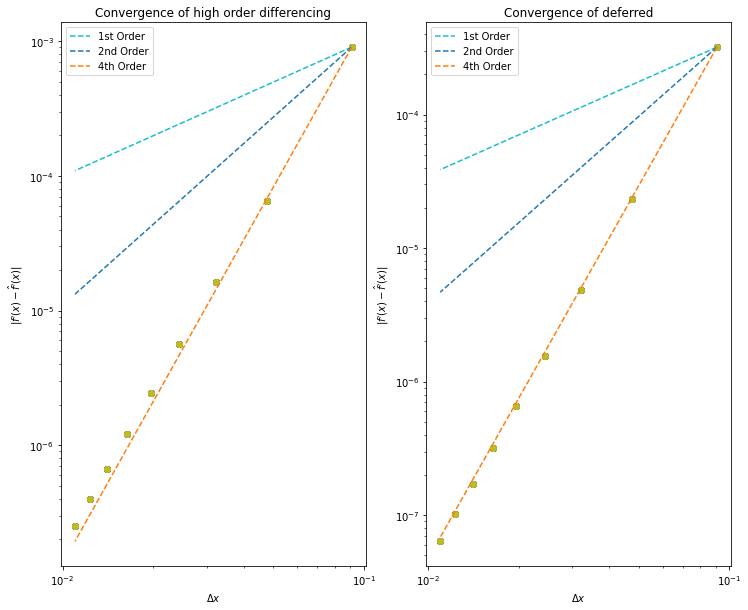

In [14]:

alpha = -5.0
beta = 3.0
L = 3.0

f = lambda x: numpy.exp(x)

u_true = lambda x, alpha, beta, L: numpy.exp(x) + (beta - alpha + 1.0 - numpy.exp(L)) / L * x - 1.0 + alpha

mrange = numpy.arange(10, 100, 10)
delta_x = numpy.empty(mrange.shape)
error_high = numpy.empty((mrange.shape[0], numpy.size(mrange)))
error_defer = numpy.empty((mrange.shape[0], numpy.size(mrange)))


for (i, m) in enumerate(mrange):
    
    x = numpy.linspace(0, 1, m + 2)
    delta_x[i] = (1 - 0) / (m + 1)
    
    #Solve matrix
    x_high, U_high = high_order_differencing(m, f, alpha, beta, L)
    x_defer, U_defer = deferred_correction(m, f, alpha, beta, L)
    
    X_high, Y_high = numpy.meshgrid(x_high, U_high)
    X_defer, Y_defer = numpy.meshgrid(x_defer, U_defer)
    
    error_high[i] = numpy.linalg.norm((x_high[1] - x_high[0]) * (u_true(X_high, alpha, beta, L) - U_high), ord=1)
    error_defer[i] = numpy.linalg.norm((x_defer[1] - x_defer[0]) * (u_true(X_defer, alpha, beta, L) - U_defer), ord=1)
       

fig = plt.figure(figsize=(12,10))

axes = fig.add_subplot(1, 2, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))

axes.loglog(delta_x, error_high, 'o')
axes.loglog(delta_x, order_C(delta_x[0], error_high[0], 1.0) * delta_x**1.0, '--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error_high[0], 2.0) * delta_x**2.0, '--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_high[0], 4.0) * delta_x**4.0, '--', label="4th Order")
axes.set_title("Convergence of high order differencing")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")
axes.legend(loc='best')

axes = fig.add_subplot(1, 2, 2)

axes.loglog(delta_x, error_defer, 'o')
axes.loglog(delta_x, order_C(delta_x[0], error_defer[0], 1.0) * delta_x**1.0, '--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error_defer[0], 2.0) * delta_x**2.0, '--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_defer[0], 4.0) * delta_x**4.0, '--', label="4th Order")
axes.set_title("Convergence of deferred")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")
axes.legend(loc='best')
plt.show()